In [2]:
# %load cp_imports.py
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Use retina backend for better figures
%config InlineBackend.figure_format = 'retina'



# QR Algorithm 

In [4]:
def qr_decomposition(matrix):
    '''
    Calculate QR decomposition of given matrix
    
    matrix: original matrix to be decomposed 
    
    return: orthogonal matrix A, upper triangular matrix  
    '''
    upper_tri = np.zeros_like(matrix)
    q = np.zeros_like(matrix)
    
    # Calculate orthogonal matrix Q
    # Select comlumn of Q, so use matrix.T
    for i, a_i in enumerate(matrix.T):
        u_i = a_i - sum([ np.dot(q[j], a_i) * q[j] for j in range(0, i)])
        # Assginment by rows
        q[i] = u_i / np.linalg.norm(u_i)
    
    upper_tri = np.matmul(q, matrix)
    
    return q.T, upper_tri


test_matrix = np.array([[1, 2], [2, 1]], dtype="float")

q, r = qr_decomposition(test_matrix)

print(q)
print(r)
print(np.matmul(q, r))

[[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]
[[2.23606798e+00 1.78885438e+00]
 [3.33066907e-16 1.34164079e+00]]
[[1. 2.]
 [2. 1.]]


In [5]:
def qr_eigenvalue(matrix, tol=1e-6, iter_limit=10**3):
    # Create a off-diagonal mask array
    off_diagonal = np.ones(matrix.shape, dtype='bool')
    off_diagonal[np.diag_indices_from(off_diagonal)] = 0
        
    # Set eigen_vector a identity matrix for iteration
    eigen_vector = np.eye(matrix.shape[0])
    # The first a_n is the input matrix
    a_n = matrix.copy()
    # Add a count parameter to limit iteration times
    count = 0
    
    while np.max(abs(a_n[off_diagonal])) >= tol \
            and count < iter_limit:
        q_n, r_n = qr_decomposition(a_n)
        a_n = np.matmul(r_n, q_n)
        eigen_vector = np.matmul(eigen_vector, q_n)
        count += 1
    
    return a_n, eigen_vector


test_arr = np.array([[1, 4, 8, 4],
                    [4, 2, 3, 7],
                    [8, 3, 6, 9],
                    [4, 7, 9, 2]], dtype="float")
    
eig_value, eig_vector = qr_eigenvalue(test_arr)

## 1-D Infinite Potential Well

Ground energy: 5.836376(eV)


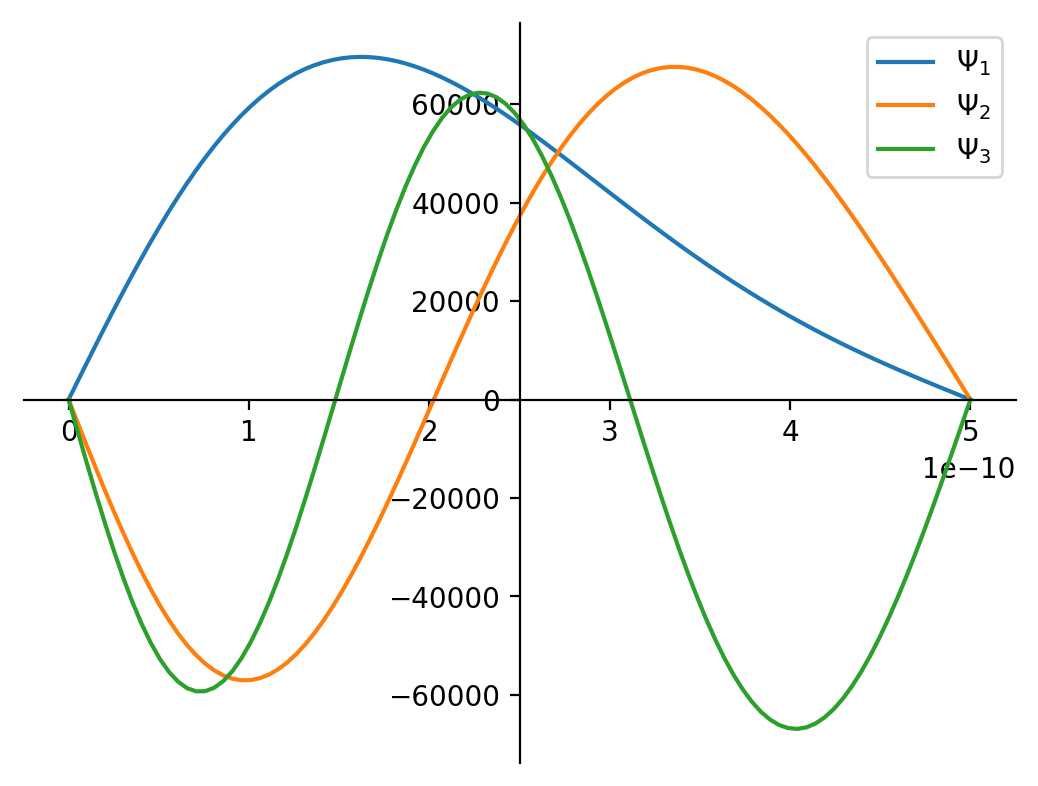

In [144]:
from scipy.constants import e, electron_mass, hbar, pi, electron_volt
from scipy.integrate import quad
from functools import partial


def hamilton(n):
    h = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            h[i, j], _ = quad(inf_wall, 0, 5 * 1e-10, args=(i+1, j+1))
    return h
    
    
def inf_wall(x, m, n):
    '''
    Hamilton operator of 1-D infinite well
    '''
    
    def potential(x):
        '''
        Potential function of 1-D infinite well
        '''
        a = 10 * electron_volt  # Unit: J
        if x >= 0 and x <= length:
            # Linear potential along x axis
            return a * x / length
        else:
            return np.Inf 
    
    length = 5 * 1e-10  # well width, Unit: m
    bra = np.sin(pi * m * x / length)
    _ket = np.sin(pi * n * x / length)
    ket = (hbar**2 / (2 * electron_mass) * \
           (pi * n / length)**2 + potential(x))\
            * _ket
    return 2 / length * bra * ket


n = 20
evalues, evectors = np.linalg.eigh(hamilton(n))
print(f"Ground energy: {evalues[0]/electron_volt:.6f}(eV)")
length = 5 * 1e-10
x = np.linspace(0, length, 100)
y = [np.zeros_like(x)] * n
for i in range(n):
    y[i] = (2 / length)**0.5 * sum([evectors[j-1, i] * np.sin(pi * j * x / length) for j in range(1, n+1)])

fig, ax = plt.subplots()
for i in range(3):
    ax.plot(x, y[i], label=f'$\Psi_{i+1}$')
ax.legend()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',length/2))
ax.yaxis.set_ticks_position('left')


In [116]:
np.trapz(y[0]**2, x=x)

0.9999999999999999

# Non-linear equation 


## Relaxation Method 

**(convergence condition: $\left|\,f'(x)\right| < 1$)**


In [ ]:
x0 = 1.
tol = 1e-4

while abs(x0 - (2 - np.exp(-x0))) > tol:
    x0 = 2 - np.exp(-x0)

print(x0)

## Bisection Method


In [142]:
def equation(x):
    return 5 * np.exp(-x) + x - 5


tol = 1e-6

# Guess a rough range of root
x0, x1 = 1, 5

while abs(x1 - x0) > tol:
    x_mid = (x0 + x1) / 2
    if equation(x_mid) * equation(x0) > 0:
        x0 = x_mid
    else:
        x1 = x_mid

print(x0, x1)

4.965113639831543 4.965114593505859


## Newton Method

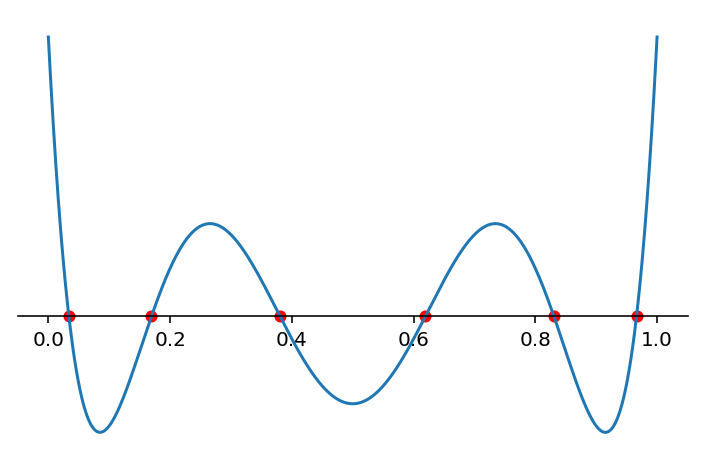

In [3]:
def poly6(x):
    return 924 * x**6 - 2772 * x**5 + 3150 * x**4\
            -1680 * x**3 + 420 * x**2 - 42 * x + 1


def poly6_diff(x):
    return 924 * 6 * x**5 - 2772 * 5 * x**4\
            + 3150 * 4 * x**3 -1680 * 3 * x**2\
            + 420 * 2 * x - 42

x = np.linspace(0, 1, 1000)

# Plot for determining roots range 
ax = plt.gca()
ax.plot(x, poly6(x))
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_color("none")
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")
ax.spines['top'].set_color("none")
ax.set_yticks([])


root_range = np.arange(0, 1.1, 0.2)
root = np.zeros(6)
tol = 1e-10

for i, x in enumerate(root_range):
    while abs(poly6(x) / poly6_diff(x)) > tol:
        x = x - poly6(x) / poly6_diff(x)
    root[i] = x

plt.scatter(root, np.zeros_like(root), marker='o', s=25, color="red")

### Lagrange point L1

$$
    \frac{GM_e}{L_1^2} - \frac{G M_m}{(R - L_1)^2} = \omega^2 L_1 
$$

[]

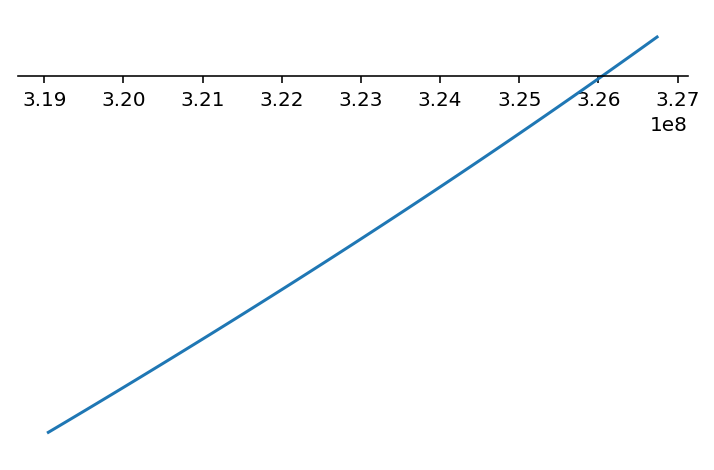

In [141]:
from scipy.constants import G


m_earth = 5.974 * 1e24 # Unit: kg
m_moon = 7.348 * 1e22 # Unit: kg
r = 3.844 * 1e8 # Unit: m
omega = 2.662 * 1e-6  # Unit: s^-1

def lagrange1(x):
    return omega**2 * x - G * (m_earth / x**2 - m_moon / (r - x)**2)


x = np.linspace(0.83 * r, 0.85 * r) 

ax = plt.gca()
ax.plot(x, lagrange1(x))
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_color("none")
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")
ax.spines['top'].set_color("none")
ax.set_yticks([])

In [19]:
eig_value.shape

(4, 4)

In [ ]:
lan[-5:-1]